# Mass Shooting in United States Report 
 **By Tanaya Surana / Div A

In [1]:
#Setup
import pandas as pd 

In [2]:
# Importing the mass shooting dataset into our notebook 
shooting_df = pd.read_csv("mass_shootings_data_usa.csv")

# Printing the shooting df 
shooting_df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2158417,"November 3, 2021",Virginia,Norfolk,NaN,3,2,NaN
1,2157991,"November 2, 2021",Alabama,Mobile,4120 Government Blvd,0,4,NaN
2,2156175,"November 1, 2021",Florida,Orlando,N Orange Ave and Wall St,0,4,NaN
3,2157206,"November 1, 2021",Texas,San Antonio,1900 block of W Laurel St,0,4,NaN
4,2155369,"October 31, 2021",Kentucky,Louisville,6210 Shepherdsville Rd,2,2,NaN
...,...,...,...,...,...,...,...,...
1995,989838,"November 16, 2017",Georgia,Columbus,1400 block of 15th Street,0,7,NaN
1996,988824,"November 14, 2017",California,Richmond,900 Block of View Dr,2,2,NaN
1997,987611,"November 14, 2017",California,Corning,17357 Stagecoach Rd,6,12,NaN
1998,986236,"November 12, 2017",Indiana,Gary,4601 Melton Rd,0,7,NaN


In [3]:
shooting_df = shooting_df.rename(columns={"Incident ID": "incident_id",
                                        "Incident Date" : "date",
                                        "State" : "state",
                                        "City Or County" : "city",
                                       "Address": "address",
                                       "# Killed": "killed",
                                        "# Injured": "injured"})

shooting_df

,incident_id,date,state,city,address,killed,injured,Operations
0,2158417,"November 3, 2021",Virginia,Norfolk,NaN,3,2,NaN
1,2157991,"November 2, 2021",Alabama,Mobile,4120 Government Blvd,0,4,NaN
2,2156175,"November 1, 2021",Florida,Orlando,N Orange Ave and Wall St,0,4,NaN
3,2157206,"November 1, 2021",Texas,San Antonio,1900 block of W Laurel St,0,4,NaN
4,2155369,"October 31, 2021",Kentucky,Louisville,6210 Shepherdsville Rd,2,2,NaN
...,...,...,...,...,...,...,...,...
1995,989838,"November 16, 2017",Georgia,Columbus,1400 block of 15th Street,0,7,NaN
1996,988824,"November 14, 2017",California,Richmond,900 Block of View Dr,2,2,NaN
1997,987611,"November 14, 2017",California,Corning,17357 Stagecoach Rd,6,12,NaN
1998,986236,"November 12, 2017",Indiana,Gary,4601 Melton Rd,0,7,NaN


In [4]:
# Total Incidents listed in this dataframes 
total_incidents = len(shooting_df)
print("There were", total_incidents, "Incidents in this dataset.")

There were 2000 Incidents in this dataset.


In [5]:
# creating a colum called "persons involved" that is a sum of killed and injured 
shooting_df["persons_involved"] = shooting_df["killed"] + shooting_df["injured"]
shooting_df["percentage_injured"]= (shooting_df ["injured"]/ shooting_df["persons_involved"])*100
shooting_df["percentage_killed"] = (shooting_df["killed"]/ shooting_df["persons_involved"])*100


#printing shootings_df in desecding order of the "persons inovlved" coloum 
shooting_df.sort_values(["persons_involved"], ascending = False )



,incident_id,date,state,city,address,killed,injured,Operations,persons_involved,percentage_injured,percentage_killed
1389,1466705,"August 3, 2019",Texas,El Paso,7101 Gateway Blvd,23,23,NaN,46,50.000000,50.000000
1940,1049217,"February 14, 2018",Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17,NaN,34,50.000000,50.000000
1353,1492441,"August 31, 2019",Texas,Odessa,8250 TX 191,8,23,NaN,31,74.193548,25.806452
1388,1467828,"August 4, 2019",Ohio,Dayton,419 E 5th St,10,17,NaN,27,62.962963,37.037037
369,2019622,"May 30, 2021",Florida,Hialeah,7630 NW 186th St,3,20,NaN,23,86.956522,13.043478
...,...,...,...,...,...,...,...,...,...,...,...
493,1963052,"March 27, 2021",Illinois,Chicago,500 block of N Leamington Ave,0,4,NaN,4,100.000000,0.000000
1232,1578711,"December 21, 2019",Louisiana,Edgard,2555 LA-18,0,4,NaN,4,100.000000,0.000000
492,1964030,"March 28, 2021",Texas,San Antonio,2011 Dollarhide Ave,0,4,NaN,4,100.000000,0.000000
1234,1577438,"December 20, 2019",Alabama,Tuskegee,2900 block of Davison St,2,2,NaN,4,50.000000,50.000000


In [6]:
# save the shootings_df as a csv file
shooting_df.to_csv("shooting_incidents.csv")

##  Most Dangerous Cities

In [7]:
#creating city_df to represent total incidents , injured, killed, and involved per cirt 
city_df = shooting_df.groupby(["city", "state"]).agg(total_incidents = ("incident_id", "count"),
                                                      total_injured = ("injured", "sum"),
                                                      total_killed = ("killed","sum"),
                                                      total_involved = ("persons_involved","sum")) 
# Sorting city_df in descending order of "total_incidents"
city_df.sort_values(["total_incidents"], ascending = False)

,,total_incidents,total_injured,total_killed,total_involved
city,state,,,,
Chicago,Illinois,173,784,95,879
Philadelphia,Pennsylvania,72,297,46,343
Baltimore,Maryland,42,181,16,197
Houston,Texas,42,148,56,204
Washington,District of Columbia,37,173,22,195
...,...,...,...,...,...
Harvey,Illinois,1,4,0,4
Hartsville,South Carolina,1,3,3,6
Happy Valley,Oregon,1,4,0,4


In [8]:
# Make a column called Persons Involved Per Incident 

city_df["persons_per_incident"] = city_df["total_involved"]/city_df["total_incidents"]

# Print city_df in descending order of "persons_incident"
city_df.sort_values(["persons_per_incident"], ascending = False)

,,total_incidents,total_injured,total_killed,total_involved,persons_per_incident
city,state,,,,,
Pompano Beach (Parkland),Florida,1,17,17,34,34.0
Odessa,Texas,1,23,8,31,31.0
El Paso,Texas,2,27,24,51,25.5
Santa Fe,Texas,1,13,10,23,23.0
Corning,California,1,12,6,18,18.0
...,...,...,...,...,...,...
Kannapolis,North Carolina,1,4,0,4,4.0
Kalamazoo,Michigan,2,7,1,8,4.0
Jonesboro,Georgia,1,2,2,4,4.0


# what makes a dangerous city 

A city will be considered as dangerous if:
- Total incidents> National Average of Total Incidents 
- Total Persons per incident> National Average of Total Persons Per Incident 


In [9]:
# Finding the mean of the total incidents column 
national_avg_total_incidents = city_df.total_incidents.mean()
national_avg_total_incidents

2.8612303290414878

In [10]:
# Finding the mean of the persons per incident column 
national_avg_persons_per_incident = city_df.persons_per_incident.mean()
national_avg_persons_per_incident

5.247185629034995

In [11]:
# Danger Cities 
danger_cities_df = city_df.loc[(city_df["total_incidents"]>national_avg_total_incidents)
                              &(city_df["persons_per_incident"]>national_avg_persons_per_incident)]
danger_cities_df.sort_values(["persons_per_incident"], ascending = False)

,,total_incidents,total_injured,total_killed,total_involved,persons_per_incident
city,state,,,,,
Dayton,Ohio,4,28,11,39,9.750000
Virginia Beach,Virginia,5,26,14,40,8.000000
Aurora,Illinois,3,17,7,24,8.000000
Trenton,New Jersey,6,45,2,47,7.833333
Pittsburgh,Pennsylvania,4,15,16,31,7.750000
Pensacola,Florida,3,18,5,23,7.666667
Long Beach,California,3,18,4,22,7.333333
Saint Paul,Minnesota,4,24,5,29,7.250000
Peoria,Illinois,3,20,1,21,7.000000


## Cities with Most Fatal Mass Shootings
For an incident to be considered as fatal,one of the following conditions must be met

- 1 Person Must Have Passed Away (Killed)

or

- 5 or More People Should Have Been Injured 

In [12]:
fatal_df = shooting_df.loc[(shooting_df["killed"]>=1) | (shooting_df["injured"] >=5)]
len(fatal_df)

1438

In [13]:
len(shooting_df)

2000

In [14]:
# Making a dataframe called fatal_df that only keep incidents that meet atleast one or more of the criteria above
fatal_df = shooting_df.loc[(shooting_df["killed"]>=1) | (shooting_df["injured"] >=5)]

# Calculating how many fatal incidents were there by counting the total rows in fatal_df
total_fatal_incidents = len(fatal_df)

#Printing the total fatal incidents 
print ("There were", total_fatal_incidents, "fatal incidents in the United States in the past 4 years") 

There were 1438 fatal incidents in the United States in the past 4 years


In [15]:
# Creating city_df to represent total fatal incidents, injured, killed, and involved per city
city_df = fatal_df.groupby(["city", "state"]).agg(total_fatal_incidents=("incident_id","count"),
                                                 total_injured = ("injured", "sum"),
                                                 total_killed = ("killed", "sum"),
                                                 total_involved = ("persons_involved","sum")) 

# Sorting city_df in descending order of total_fatal_incidents 
city_df.sort_values(["total_fatal_incidents"], ascending = False) 

,,total_fatal_incidents,total_injured,total_killed,total_involved
city,state,,,,
Chicago,Illinois,113,544,95,639
Philadelphia,Pennsylvania,47,197,46,243
Houston,Texas,34,116,56,172
Baltimore,Maryland,26,117,16,133
Washington,District of Columbia,24,121,22,143
...,...,...,...,...,...
Gwynn Oak (Woodlawn),Maryland,1,1,4,5
Gulfport,Mississippi,1,5,1,6
Gresham,Oregon,1,7,0,7


## State Analysis 

In [16]:
state_df = shooting_df.groupby(["state"]).agg(total_incidents = ("incident_id", "count"),
                                              total_injured = ("injured", "sum"),
                                                 total_killed = ("killed", "sum"),
                                                 total_involved = ("persons_involved","sum")) 

state_df.sort_values(["total_incidents"], ascending = False) 

,total_incidents,total_injured,total_killed,total_involved
state,,,,
Illinois,225,1000,146,1146
California,166,653,210,863
Texas,130,535,195,730
Florida,108,466,124,590
Pennsylvania,100,395,89,484
Louisiana,97,404,77,481
New York,90,402,46,448
Ohio,84,373,80,453
Missouri,69,263,71,334


## Data Visualisation 

In [22]:
# Data Via Setup 
import seaborn as sns
import matplotlib.pyplot as plt 

## Bar Chart that shows the top 10 States with the most incidents

In [23]:
# Making Our Bar Chart Dataframes 
bar_chart_df = shooting_df.groupby(["state"]).agg(total_incidents = ("incident_id", "count")) 
bar_chart_df = bar_chart_df.sort_values(["total_incidents"], ascending = False). head(10).reset_index()
bar_chart_df

,state,total_incidents
0,Illinois,225
1,California,166
2,Texas,130
3,Florida,108
4,Pennsylvania,100
5,Louisiana,97
6,New York,90
7,Ohio,84
8,Missouri,69
9,Georgia,65


<AxesSubplot:xlabel='state', ylabel='total_incidents'>

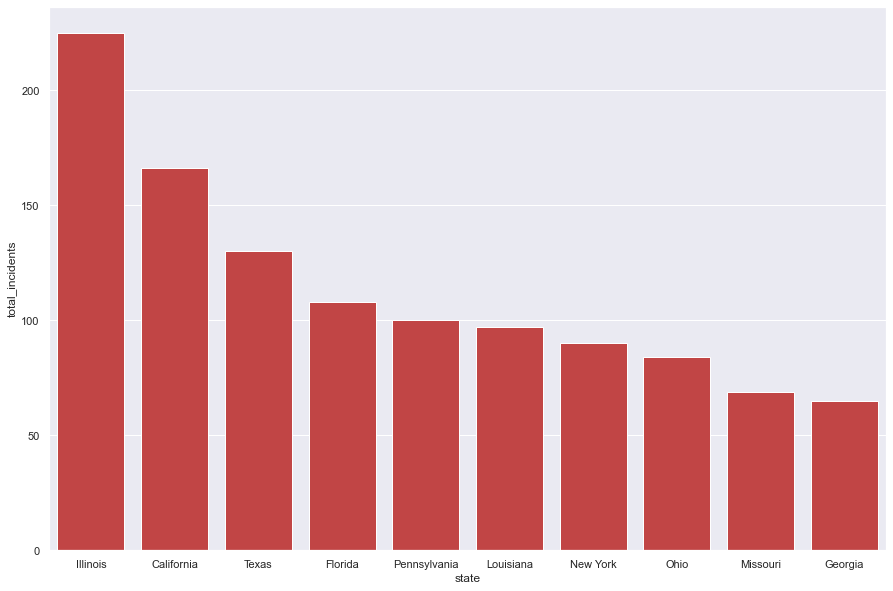

In [24]:
# Printing a bar chart 
sns.set(rc={'figure.figsize':(15,10)}) 
sns.barplot(x = "state", y = "total_incidents", data = bar_chart_df, color= "#d63031")